In [1]:
# can be removed if LinOT package is installed via pip
import sys
sys.path.append('../../lib')


import os
import numpy as np

import LinOT
from LinOT.Visualization import *
import LinOT.auxiliary as aux
import LinOT.SinkhornNP as Sinkhorn


import json

In [2]:
boundary=5.
discr=200

X,Y=np.meshgrid(np.linspace(0,boundary,discr),np.linspace(0,boundary,discr))
points=np.transpose([X,Y],(1,2,0))

# Moving circle along axis

In [3]:
dataDir="data/translatedDisks1D/"

In [4]:
R=.2
N=50


centers=np.random.rand(N,2)*(boundary-2*R)+R
radii=np.array([R]*N)
centers[:,1]=0.5*boundary
inDisks=(np.linalg.norm(points.reshape(1,discr,discr,2)-centers.reshape(N,1,1,2),axis=-1)<=radii.reshape(N,1,1))
posNus=[points[inDisks[i]] for i in range(N)]
nus=[np.ones(pts.shape[0])/(pts.shape[0]) for pts in posNus]

centerMu=np.array([0.5*boundary,0.5*boundary])
inDiskMu=(np.linalg.norm(points.reshape(discr,discr,2)-centerMu.reshape(1,1,2),axis=-1)<=R)
posMu=points[inDiskMu]
mu=np.ones(posMu.shape[0])/posMu.shape[0]

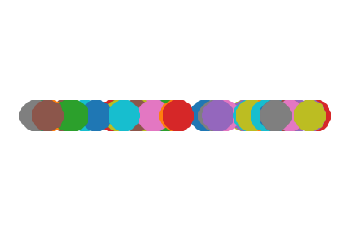

In [5]:
plt.scatter(posMu[:,0],posMu[:,1],c='k')

for pts in posNus:
    plt.scatter(pts[:,0],pts[:,1])
plt.axis("equal")
plt.axis("off")
plt.show()

In [6]:
fileSamples = dataDir + "sampleDisks.npz"
fileCenter = dataDir + "centerTan.npz"

dirname = os.path.dirname(fileSamples)

if not os.path.isdir(dirname):
    os.mkdir(dirname)


np.savez_compressed(fileSamples, *posNus)
np.savez(fileCenter, posMu=posMu)

## HK logs

In [7]:
params = {}


params["setup_HKScale"] = 6.
params["solver_errorGoal"] = 1.E-3
params["solver_epsStart"] = 1.E2
params["solver_epsTarget"] = 1.E-3

fileParams=dataDir+'params.json'
with open(fileParams, 'w') as fp:
    json.dump(params, fp)

In [8]:
tanListV = []
tanListAlpha = []
posMuD = posMu.astype(np.double)
for i in range(N):
    print(i)
    nu = nus[i]
    posNu = posNus[i]

    # solve HK transport
    value, piCSR = Sinkhorn.SolveHK(mu, posMu, nu, posNu, HKScale=params["setup_HKScale"],
                                    SinkhornError=params["solver_errorGoal"],
                                    epsTarget=params["solver_epsTarget"], epsInit=params["solver_epsStart"],
                                    returnSolver=False
                                    )

    v, alpha = LinOT.LogHK(piCSR, mu, posMu, posNu, kappa=params["setup_HKScale"])
    tanListV.append(v)
    tanListAlpha.append(alpha)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [9]:
tanListV = np.array(tanListV)
tanListAlpha=np.array(tanListAlpha)
filename = dataDir + "tan_data_HK.npz"
np.savez_compressed(filename, tanListV=tanListV, tanListAlpha=tanListAlpha)

# Random centers and radii

In [10]:
dataDir="data/TranslatedNScaledDisks/"

In [11]:
R=.5
discr=200
N=50
RADSCALE=1.4
Rmax=RADSCALE*R

centers=np.random.rand(N,2)*(boundary-2*Rmax)+Rmax
radii=np.random.rand(N)*2*(Rmax-R)+2*R-Rmax

inDisks=(np.linalg.norm(points.reshape(1,discr,discr,2)-centers.reshape(N,1,1,2),axis=-1)<=radii.reshape(N,1,1))
posNus=[points[inDisks[i]] for i in range(N)]
nus=[np.ones(pts.shape[0])/(pts.shape[0]) for pts in posNus]

centerMu=np.array([0.5*boundary,0.5*boundary])
inDiskMu=(np.linalg.norm(points.reshape(discr,discr,2)-centerMu.reshape(1,1,2),axis=-1)<=R)
posMu=points[inDiskMu]
mu=np.ones(posMu.shape[0])/posMu.shape[0]

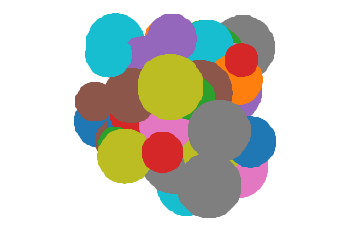

In [12]:
plt.scatter(posMu[:,0],posMu[:,1],c='k')

for pts in posNus:
    plt.scatter(pts[:,0],pts[:,1])
plt.axis("equal")
plt.axis("off")
plt.show()

In [13]:
newDisks=True

In [14]:
if newDisks:
    fileSamples = dataDir + "sampleDisks.npz"
    fileCenter = dataDir + "centerTan.npz"

    dirname = os.path.dirname(fileSamples)

    if not os.path.isdir(dirname):
        os.mkdir(dirname)


    np.savez_compressed(fileSamples, *posNus)
    np.savez(fileCenter, posMu=posMu)

## HK logs

In [22]:
params = {}
params["setup_HKScale"] = 6.
params["solver_errorGoal"] = 1.E-2
params["solver_epsStart"] = 1.E2
params["solver_epsTarget"] = 1.E-3


fileParams=dataDir+'params.json'
with open(fileParams, 'w') as fp:
    json.dump(params, fp)

In [23]:
tanListV = []
tanListAlpha = []
for i in range(N):
    print(i)
    nu = nus[i]
    posNu = posNus[i]

    # solve HK transport
    value, piCSR = Sinkhorn.SolveHK(mu, posMu, nu, posNu, HKScale=params["setup_HKScale"],
                                    SinkhornError=params["solver_errorGoal"],
                                    epsTarget=params["solver_epsTarget"], epsInit=params["solver_epsStart"],
                                    returnSolver=False
                                    )

    v, alpha = LinOT.LogHK(piCSR, mu, posMu, posNu, kappa=params["setup_HKScale"])
    tanListV.append(v)
    tanListAlpha.append(alpha)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [24]:
tanListV = np.array(tanListV)
tanListAlpha=np.array(tanListAlpha)
filename = dataDir + "tan_data_HK.npz"
np.savez_compressed(filename, tanListV=tanListV, tanListAlpha=tanListAlpha)